In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Bidirectional, LSTM, SimpleRNN,GRU,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [25]:
# Load the dataset
# df = pd.read_excel('../../dataset/Dataset_IoV.xlsx')  
df = pd.read_csv('..//..//dataset//final_dataset.csv')  


# Separating features and target
X = df[['Number of Lanes', 'Status of driver', 'Nature of environment', 'Velocity of vehicle', 'Distance between vehicles', 'Breaking capability']]
y = df['Collussion']
# scaler=RobustScaler()
# X_scaled = scaler.fit_transform(X)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled = X

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [26]:
print(X_train.shape, y_train.shape,X_scaled.shape)

(320000, 1, 6) (320000,) (400000, 1, 6)


In [27]:
print(X_train,X_test,y_train,y_test)

[[[2.   2.   2.   0.35 0.   0.  ]]

 [[2.   1.   2.   0.35 0.   0.  ]]

 [[2.   1.   2.   0.65 0.   0.  ]]

 ...

 [[2.   1.   1.   0.65 0.   0.  ]]

 [[2.   2.   2.   0.35 0.   0.  ]]

 [[2.   2.   2.   0.35 0.5  0.  ]]] [[[2.   1.   1.   0.65 0.   0.  ]]

 [[1.   2.   2.   0.35 0.5  0.  ]]

 [[2.   1.   1.   0.65 0.   0.  ]]

 ...

 [[2.   2.   1.   0.65 0.   0.  ]]

 [[2.   1.   1.   0.35 0.   0.  ]]

 [[2.   2.   1.   0.35 0.5  0.  ]]] 242245    1
288918    0
105103    1
63504     0
239180    0
         ..
259178    1
365838    1
131932    0
146867    1
121958    1
Name: Collussion, Length: 320000, dtype: int64 23218     0
20731     1
39555     0
147506    0
314215    0
         ..
54840     0
103       0
339434    1
315677    0
164567    1
Name: Collussion, Length: 80000, dtype: int64


# Model

In [28]:
def build_ann():
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    
    # Fully connected (dense) hidden layer
    model.add(Dense(units=128, activation='relu'))
    
    # Output layer
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['mse', 'mae'])
    
    return model

In [29]:
# Instantiate and train the model
model = build_ann()
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.1664 - mae: 0.1300 - mse: 0.0478 - val_loss: 7.3875e-04 - val_mae: 7.0596e-04 - val_mse: 4.0273e-05
Epoch 2/5
 3532/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 7.5003e-04 - mae: 6.8947e-04 - mse: 5.4984e-05

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Make predictions
y_pred = model.predict(X_test)




1293/1293 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [20]:
# Convert continuous output to binary (0 or 1) using a threshold

y_pred_binary = (y_pred > 0.5).astype(int)
y_pred_binary = y_pred_binary.flatten()

# Convert y_test to a NumPy array and flatten
y_test_flat = y_test.to_numpy().flatten()

y_pred_flat = y_pred.flatten()
mse = mean_squared_error(y_test_flat, y_pred_flat)
print(f'Mean Squared Error for y_pred_flat (MSE): {mse:.16f}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.16f}')


Mean Squared Error for y_pred_flat (MSE): 0.0000006567746027
Root Mean Squared Error (RMSE): 0.0008104163144354


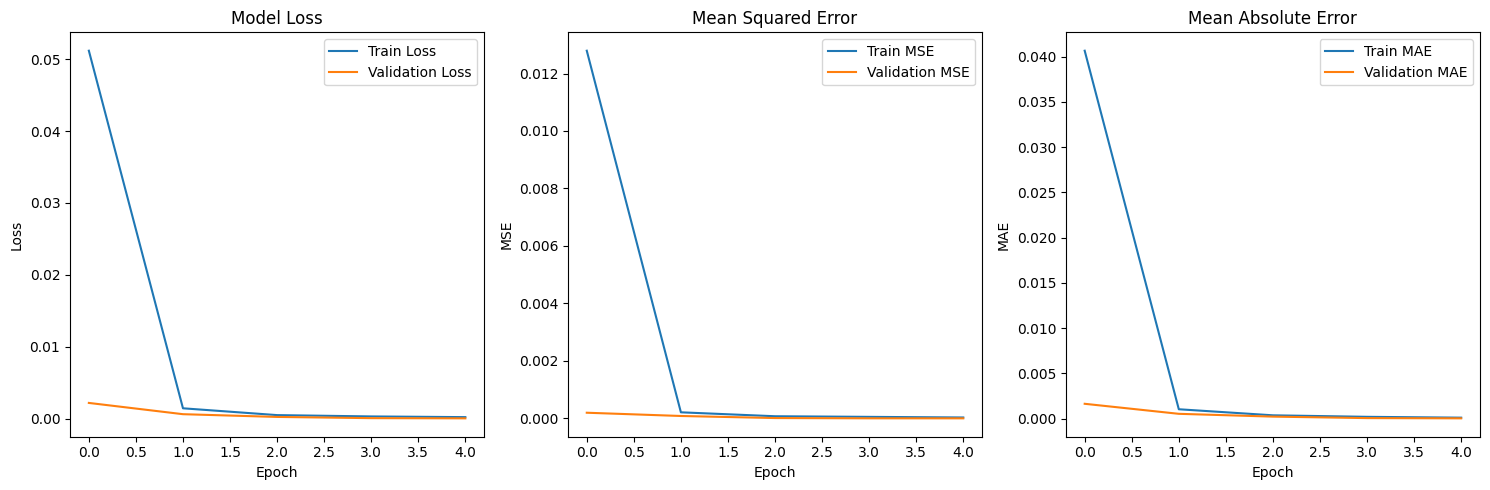

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the loss, MSE, and MAE
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# MSE plot
plt.subplot(1, 3, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# MAE plot
plt.subplot(1, 3, 3)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [22]:
import time

# Start time
start_time = time.time()

# Make predictions
y_pred = model.predict(X_test)

# End time
end_time = time.time()

# Total AES time
total_time = end_time - start_time  

# AES per sample
aes_per_sample = (total_time / len(X_test)) * 1e6  # Convert to microseconds (µs)

print(f'Total AES Time: {total_time:.6f} seconds')
print(f'AES Time per Sample: {aes_per_sample:.2f} µs/sample')


1293/1293 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Total AES Time: 5.122471 seconds
AES Time per Sample: 123.87 µs/sample
